# **Visualizing effect of stride in convolution:**

**image credits: Photo by <a href="https://unsplash.com/@nickxshotz?utm_content=creditCopyText&utm_medium=referral&utm_source=unsplash">Nicholas Green</a> on <a href="https://unsplash.com/photos/shallow-focus-photography-of-man-in-white-shirt-nPz8akkUmDI?utm_content=creditCopyText&utm_medium=referral&utm_source=unsplash">Unsplash</a>**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from imageio.v2 import imread

In [2]:
def Convolve(img: np.ndarray,kernel:np.ndarray,pad:bool=True,stride:tuple=(1,1))->np.ndarray:
    '''
    Convolve function performs the convolution operation on the input image with the given kernel.
    
    Args:
        img (np.ndarray):        The input image.
        kernel (np.ndarray):     The convolution kernel.
        pad (bool, optional):    Whether to pad the image or not. Default is True.
                                 Image is padded with zeros by default
        stride (tuple,optional): It is the step size by which the kernel is slided over 
                                 the image during convolution. The default value is set to
                                 (1,1) pixel units.It is a whole number and helps to downsample the image or decrease its size.

    Returns:
        np.ndarray: The convolved image.
    '''
    kernel_size=kernel.shape[0] ### get the size of kernel (usually square kernel with odd size).
    padding=kernel_size//2 ### decide the padding size.

    if pad:
        ### creating an ndarray of zeros of shape of image with padding appended on each side.
        if len(img.shape)==3:
            padded_img=np.zeros((img.shape[0]+2*padding,img.shape[1]+2*padding,3))
        else:
            padded_img=np.zeros((img.shape[0]+2*padding,img.shape[1]+2*padding))
        padded_img[padding:padded_img.shape[0]-padding,padding:padded_img.shape[1]-padding]=img
    else:
        ### if there is padding, then padding image is the original image.
        padded_img=img

    ### for both 2D and 3D convolution, the result is 2D.
    ### considering effect of padding and stride
    Nh= int(np.floor((img.shape[0]+2*padding-kernel_size)/stride[0]))+1
    Nw= int(np.floor((img.shape[1]+2*padding-kernel_size)/stride[1]))+1

    result=np.zeros(shape=(Nh,Nw))
    ### for 3D convolution, create a 3D kernel for given 1D to apply convolution to all three channels.
    kernel=np.dstack((kernel,kernel,kernel)) if len(padded_img.shape)==3 else kernel

    ### leaving sufficient place (padding) perform convolution (dot product) and store the value in result.
    for i in range(padding,padded_img.shape[0]-padding,stride[0]):
        for j in range(padding,padded_img.shape[1]-padding,stride[1]):
            ### if the image is colored then all channels must be included and a 3D kernel needs to be used.
            if len(padded_img.shape)==3:
                result[int((i-padding)/stride[0]),int((j-padding)/stride[1])]=np.sum(kernel*padded_img[i-kernel_size//2:i+(kernel_size//2)+1,j-kernel_size//2:j+(kernel_size//2)+1,:])
            else:   
                result[int((i-padding)/stride[0]),int((j-padding)/stride[1])]=np.sum(kernel*padded_img[i-kernel_size//2:i+(kernel_size//2)+1,j-kernel_size//2:j+(kernel_size//2)+1])
    ### return the result
    return result   

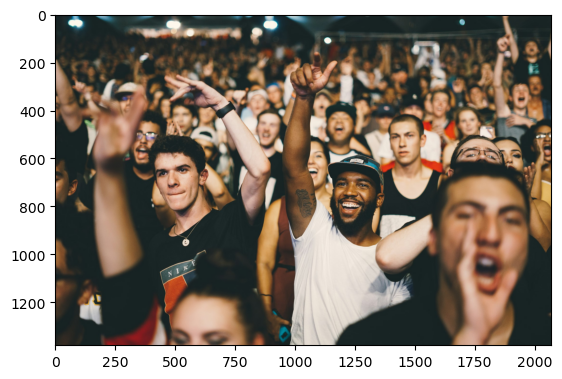

In [3]:
img=imread('https://images.unsplash.com/photo-1501386761578-eac5c94b800a?q=80&w=2070&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D')
plt.imshow(img)
plt.show()

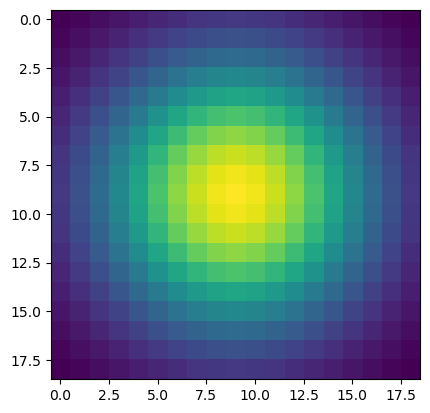

In [4]:
# convolution kernel (Gaussian Blurring Kernel)
kernelN=19
X,Y=np.meshgrid(np.linspace(-int(kernelN/2),int(kernelN/2),kernelN),np.linspace(-int(kernelN/2),int(kernelN/2),kernelN))
variance=50
kernel=np.exp(-(X**2+Y**2)/variance)

plt.imshow(kernel)
plt.show()

In [5]:
strides=[(1,1),(2,2),(4,4),(8,8),(16,16),(32,32)]
conv_outputs=[]
for stride in strides:
    conv_outputs.append(Convolve(img=img.copy(),kernel=kernel,pad=True,stride=stride))

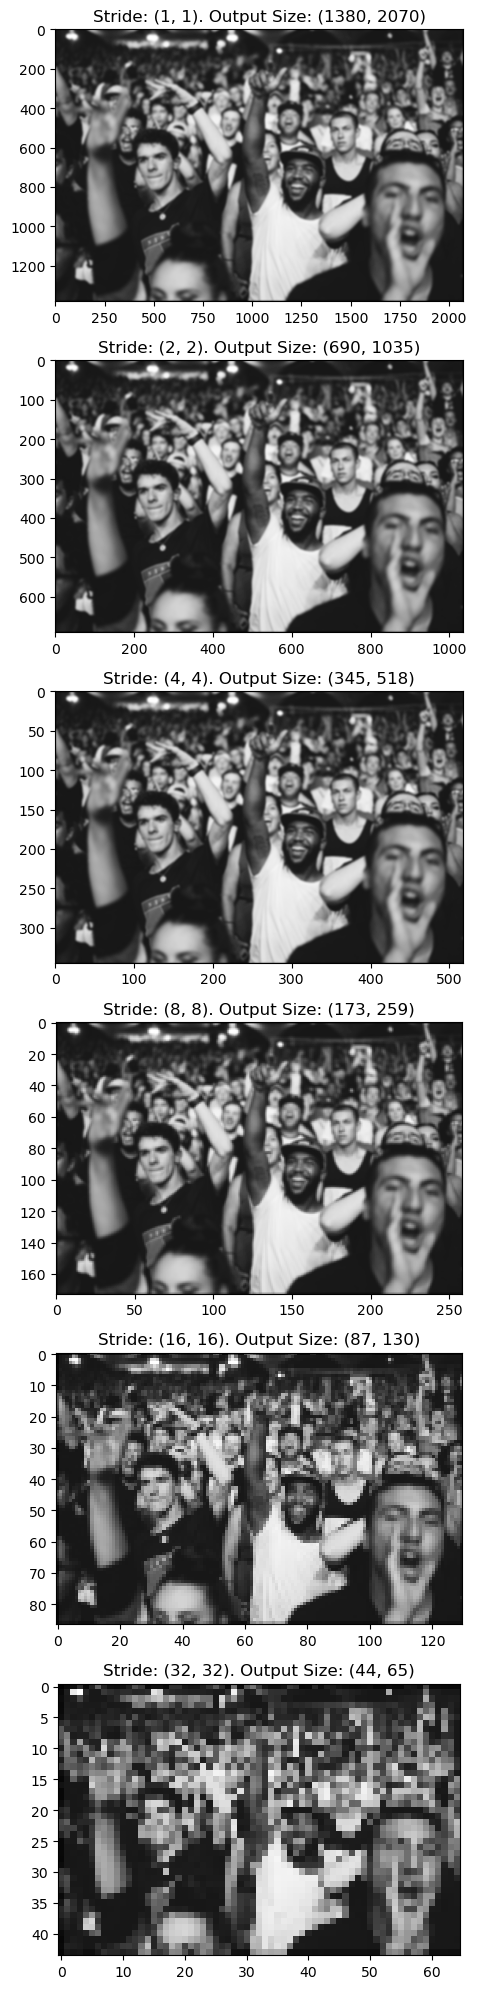

In [17]:
fig,axs=plt.subplots(6,1,figsize=(200,20))

for i,conv_img in enumerate(conv_outputs):
    axs[i].imshow(conv_img,cmap="gray")
    axs[i].set_title(f"Stride: {strides[i]}. Output Size: {conv_img.shape}")
plt.tight_layout()
plt.show()